# Homework 3 - Pairwise Alignments

#### (1) Using Biopython, perform a pairwise sequence alignment for the following sequences `MTPARGSALS` and `MTPVRRSLS`. Use a match score of 2, a mismatch score of -1 and a gap open of -2 and a gap extension score of -1. What is the alignment and final score?  How many optimal alignments were found?

In [1]:
from Bio import Seq, Align

seq1 = Seq.Seq("MTPARGSALS")
seq2 = Seq.Seq("MTPVRRSLS")

aln = Align.PairwiseAligner(match_score=1.0)
aln.mismatch_score = -1.0
aln.open_gap_score = -2.0
aln.extend_gap_score = -1.0
print(aln.score(seq1, seq2))
alns = aln.align(seq1,seq2)
for alignment in alns:
    print(alignment)

3.0
target            0 MTPARGSALS 10
                  0 |||.|.|-|| 10
query             0 MTPVRRS-LS  9



#### (2) For the same two sequences, find the optimal alignment using the [EMBOSS Needle application](https://www.ebi.ac.uk/Tools/psa/emboss_needle/). Calculate the scores and optimal alignments using the BLOSUM62, PAM250, and PAM30 similarity matrices. Have a gap open penalty of 1 and a gap extension penalty of 1. Copy the results below.

*You are performing the alignment 3 times for this question.*


##### BLOSUM62

########################################
# Program: needle
# Rundate: Fri 26 Apr 2024 03:27:17
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20240426-032708-0524-16919515-p1m.asequence
#    -bsequence emboss_needle-I20240426-032708-0524-16919515-p1m.bsequence
#    -datafile EBLOSUM62
#    -gapopen 1.0
#    -gapextend 1.0
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -sprotein1
#    -sprotein2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EBLOSUM62
# Gap_penalty: 1.0
# Extend_penalty: 1.0
#
# Length: 10
# Identity:       7/10 (70.0%)
# Similarity:     7/10 (70.0%)
# Gaps:           1/10 (10.0%)
# Score: 31.0
# 
#
#=======================================

EMBOSS_001         1 MTPARGSALS     10
                     |||.|.| ||
EMBOSS_001         1 MTPVRRS-LS      9


#---------------------------------------
#---------------------------------------

#### PAM250

########################################
# Program: needle
# Rundate: Fri 26 Apr 2024 03:30:07
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20240426-033002-0520-75941625-p1m.asequence
#    -bsequence emboss_needle-I20240426-033002-0520-75941625-p1m.bsequence
#    -datafile EPAM250
#    -gapopen 1.0
#    -gapextend 1.0
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -sprotein1
#    -sprotein2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EPAM250
# Gap_penalty: 1.0
# Extend_penalty: 1.0
#
# Length: 10
# Identity:       6/10 (60.0%)
# Similarity:     7/10 (70.0%)
# Gaps:           1/10 (10.0%)
# Score: 29.0
# 
#
#=======================================

EMBOSS_001         1 MTPARGSALS     10
                     |||.| .:||
EMBOSS_001         1 MTPVR-RSLS      9


#---------------------------------------
#---------------------------------------


##### PAM30

########################################
# Program: needle
# Rundate: Fri 26 Apr 2024 03:31:52
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20240426-033148-0874-58968650-p1m.asequence
#    -bsequence emboss_needle-I20240426-033148-0874-58968650-p1m.bsequence
#    -datafile EPAM30
#    -gapopen 1.0
#    -gapextend 1.0
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -sprotein1
#    -sprotein2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EPAM30
# Gap_penalty: 1.0
# Extend_penalty: 1.0
#
# Length: 11
# Identity:       7/11 (63.6%)
# Similarity:     7/11 (63.6%)
# Gaps:           3/11 (27.3%)
# Score: 48.0
# 
#
#=======================================

EMBOSS_001         1 MTPARG-SALS     10
                     |||.|  | ||
EMBOSS_001         1 MTPVR-RS-LS      9


#---------------------------------------
#---------------------------------------


#### (3) Do the similarity matrices lead to similar alignments, or are their differences? Look at the three matrices and lookup how they were created. Describe your findings here.
Similarity matrices do not treat all mis-matches the same. For example, the A (alanine) and G (glycine) amino acids differ by just a single methyl group (CH3, one carbon and 3 hydrogens). They have similar structural and chemical properties. As a result, an A $\rightarrow$ G substitution is typically not penalized. On the contrast, an A to W (tryptophan) substitution constitutes a large change structurally and chemically and is more heavily penalized.

**G** (Glycine) | **A** (Alanine) | **W** (Tryptophan)
 -- | -- | -- |
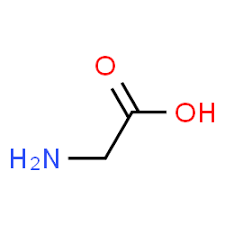 | 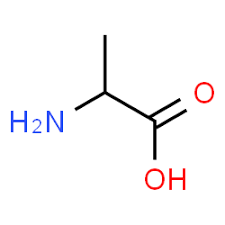 | 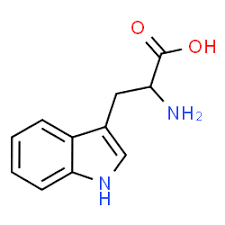

#### (4) Implement your own Needleman-Wunsch algorithm. Make the simplifying assumption that there is just a single optimal alignment. 
*If two moves lead to the same score, keep track of just one. In this situation, prioritize diagonal moves over vertical or lateral.*

`NeedlemanWunsch(seqX, seqY, match, mismatch, gap)`


In [16]:
import numpy as np

def needlemanWunsch(seqX, seqY, match, mismatch, gap):
    lenX = len(seqX)
    lenY = len(seqY)
    mat = np.zeros((lenY+1,lenX+1))
    mat2 = np.zeros((lenY+1,lenX+1),dtype=str)
    mat[0,0] = 0
    mat2[0,0] = 'N'
    for i in range(1,lenY+1):
        mat[i,0] = -2*i
        mat2[i,0] = 'V'
    for j in range(1,lenX+1):
        mat[0,j] = -2*j
        mat2[0,j] = 'H'
    for x in range(1,lenX+1):
        for y in range(1,lenY+1):
            if seqX[x-1] == seqY[y-1]:
                v = match
            else:
                v = mismatch
            diagonal = mat[y-1,x-1] + v
            vertical = mat[y-1,x] + gap
            horizontal = mat[y,x-1] + gap
            mat[y,x] = max(diagonal, vertical, horizontal)
            if mat[y,x] == diagonal:
                mat2[y,x] = 'D'
            elif mat[y,x] == vertical:
                mat2[y,x] = 'V'
            elif mat[y,x] == horizontal:
                mat2[y,x] = 'H'
    stringX = ""
    stringY = ""
    while x>0 or y>0:
        if mat2[y,x] == 'D':
            stringY = seqY[y-1] + stringY
            stringX = seqX[x-1] + stringX
            y-=1
            x-=1
        elif mat2[y,x] == 'H':
            stringY = '-' + stringY
            stringX = seqX[x-1] + stringX
            x-=1
        elif mat2[y,x] == 'V':
            stringY = seqY[y-1] + stringY
            stringX = '-' + stringX
            y-=1
    print(mat)
    print(mat2)
    print(stringX)
    print(stringY)

needlemanWunsch("MTPARGSALS", "MTPVRRSLS", 1, -1, -2)

[[  0.  -2.  -4.  -6.  -8. -10. -12. -14. -16. -18. -20.]
 [ -2.   1.  -1.  -3.  -5.  -7.  -9. -11. -13. -15. -17.]
 [ -4.  -1.   2.   0.  -2.  -4.  -6.  -8. -10. -12. -14.]
 [ -6.  -3.   0.   3.   1.  -1.  -3.  -5.  -7.  -9. -11.]
 [ -8.  -5.  -2.   1.   2.   0.  -2.  -4.  -6.  -8. -10.]
 [-10.  -7.  -4.  -1.   0.   3.   1.  -1.  -3.  -5.  -7.]
 [-12.  -9.  -6.  -3.  -2.   1.   2.   0.  -2.  -4.  -6.]
 [-14. -11.  -8.  -5.  -4.  -1.   0.   3.   1.  -1.  -3.]
 [-16. -13. -10.  -7.  -6.  -3.  -2.   1.   2.   2.   0.]
 [-18. -15. -12.  -9.  -8.  -5.  -4.  -1.   0.   1.   3.]]
[['N' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['V' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['V' 'V' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['V' 'V' 'V' 'D' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['V' 'V' 'V' 'V' 'D' 'D' 'D' 'D' 'D' 'D' 'D']
 ['V' 'V' 'V' 'V' 'D' 'D' 'H' 'H' 'H' 'H' 'H']
 ['V' 'V' 'V' 'V' 'D' 'D' 'D' 'D' 'D' 'D' 'D']
 ['V' 'V' 'V' 'V' 'D' 'V' 'D' 'D' 'H' 'H' 'D']
 ['V' 'V' 'V' 'V' 'D' 'V' 'D' 'V' 'D' 'D' '